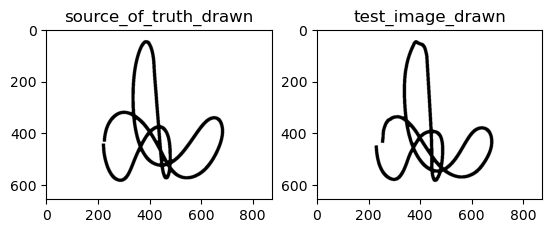

match is:  0.2508190845940936


In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

source_of_truth = cv2.imread('..\\Visualisations\\Session01_Resampled_Average_Figures\\60bpm_mf_44path_Normal_SplitCycles_TimeBased_Session01_ExpA1_All_Resampled_Average_000200.png')
test_image = cv2.imread('..\\Visualisations\\Session01_Resampled_Average_Figures\\60bpm_mf_44path_Normal_SplitCycles_TimeBased_Session01_ExpA1_004_SavedCycle_4_Resampled_000209.png')
assert source_of_truth is not None, "file could not be read, check with os.path.exists()"
assert test_image is not None, "file could not be read, check with os.path.exists()"

source_of_truth = cv2.cvtColor(source_of_truth,cv2.COLOR_BGR2GRAY) #gray scale image
ret1, thresh1 = cv2.threshold(source_of_truth, 127, 255, 0)
source_of_truth_contours_found, contours_truth, hierarchy1 = cv2.findContours(thresh1, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
cnt1 = contours_truth[1]


test_image = cv2.cvtColor(test_image,cv2.COLOR_BGR2GRAY) #gray scale image
ret2, thresh2 = cv2.threshold(test_image, 127, 255, 0)
test_image_contours_found, contours_test, hierarchy2 = cv2.findContours(thresh2, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
cnt2 = contours_test[1]

source_of_truth_drawn = cv2.drawContours(source_of_truth_contours_found, contours_truth, -1, (255,255,255), 3)
test_image_drawn = cv2.drawContours(test_image_contours_found, contours_test, -1, (255,255,255), 3)

# plot
fig, axes = plt.subplots(nrows=1, ncols=2)
plt.subplot(1,2,1)
plt.imshow(source_of_truth_drawn, cmap='gray')
plt.title("source_of_truth_drawn")

plt.subplot(1,2,2)
plt.imshow(test_image_drawn, cmap='gray')
plt.title("test_image_drawn")
plt.show()

# match shpaes
ret_match = cv2.matchShapes(cnt1,cnt2,1,0.000)
print("match is: ", ret_match)